<a href="https://colab.research.google.com/github/Clairekmkim/Clairekmkim/blob/main/penguin_species_decision_tree_gini_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(344, 7)
0.9423076923076923
[[47  0  0]
 [ 5 16  0]
 [ 1  0 35]]


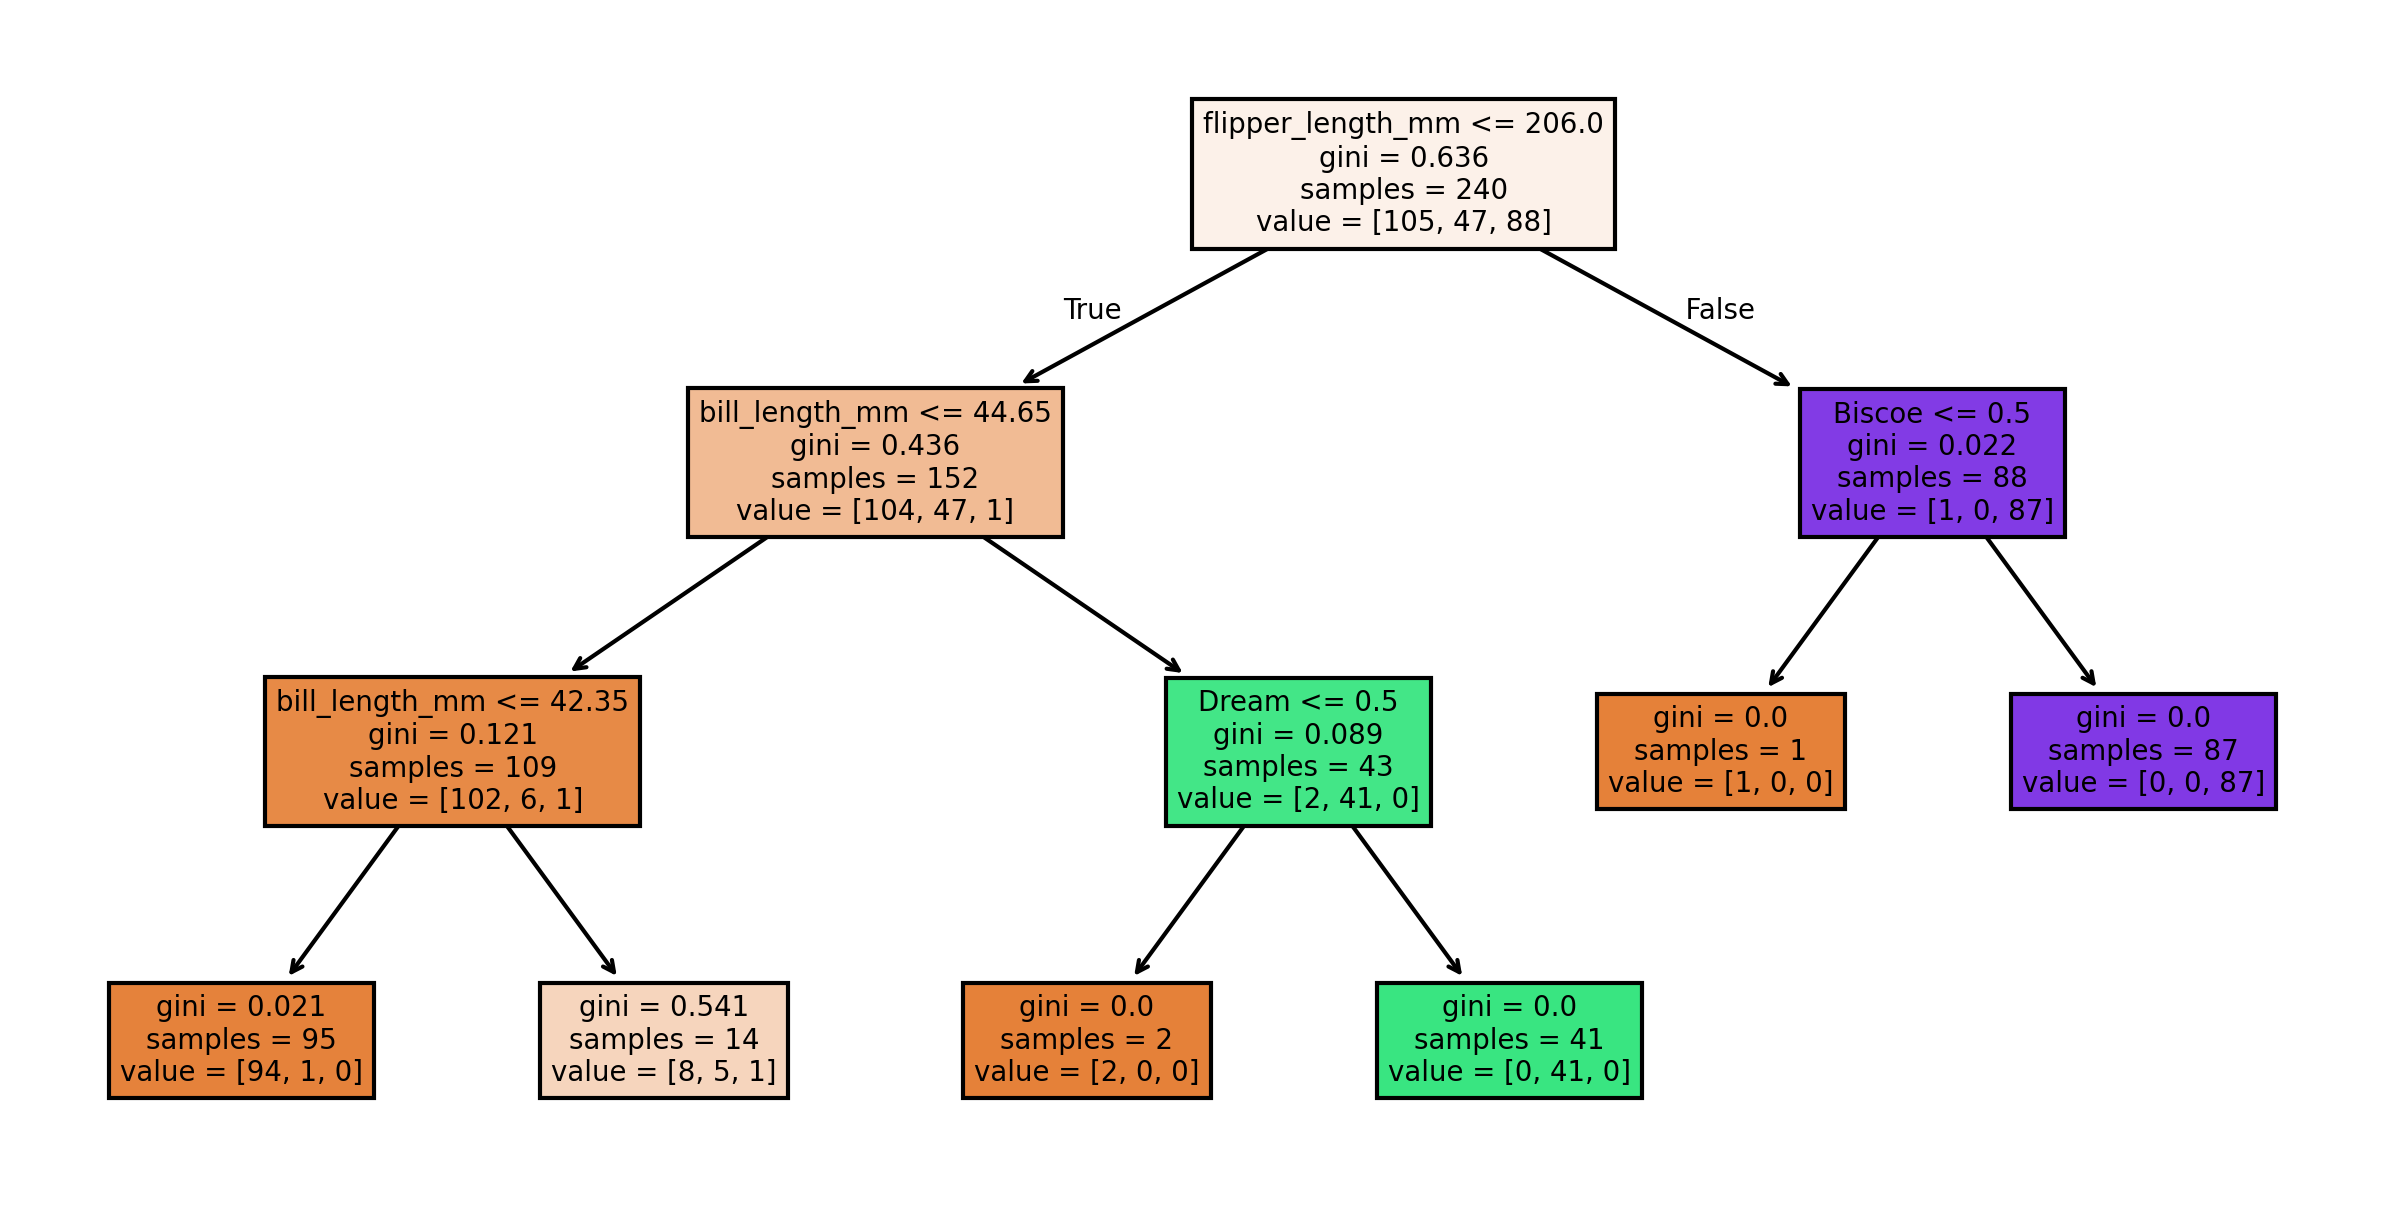

In [10]:
import os                                                  # Operating system interface
import pandas as pd                                        # Data manipulation and analysis
import numpy as np                                         # Numerical computing tools
import sklearn                                             # Machine learning library
from sklearn.tree import DecisionTreeClassifier            # Decision tree classifier model
from sklearn.tree import export_text, export_graphviz      # Tree visualization tools
from sklearn.model_selection import train_test_split       # Splitting dataset into train and test sets
from sklearn.metrics import confusion_matrix               # Evaluation metric for classification
import matplotlib.pyplot as plt                            # Plotting library
import seaborn as sns                                      # Statistical data visualization

penguins = sns.load_dataset('penguins')                    # Load the penguins dataset from seaborn
print(penguins.shape)                                      # Print the shape of the dataset (rows, columns)
penguins.head()                                            # Display the first few rows of the dataset

# Fill missing values with mean for numeric columns
columns_to_fill = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in columns_to_fill:
    penguins[col] = penguins[col].fillna(penguins[col].mean())  # Fill NaN with mean

# Convert categorical variables to numeric
penguins['sex'] = penguins['sex'].apply(lambda x: 1 if x == 'MALE' else 0)  # Encode sex as binary (1 for MALE, 0 for others)
penguins['Biscoe'] = penguins['island'].apply(lambda x: 1 if x == 'Biscoe' else 0)  # Create binary feature for Biscoe island
penguins['Dream'] = penguins['island'].apply(lambda x: 1 if x == 'Dream' else 0)    # Create binary feature for Dream island

# Define feature columns
colnames = ['bill_length_mm', 'bill_depth_mm',
            'flipper_length_mm', 'body_mass_g', 'sex',
            'Biscoe', 'Dream']

# Create feature matrix X
X = penguins[colnames]

# Create target variable y (species)
y = penguins.iloc[:,0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state=123)



# Create and train the Decision Tree Classifier
pen_tree = DecisionTreeClassifier(criterion = 'gini',  # Use Gini impurity as the criterion
                                  max_depth = 3,       # Set maximum depth of the tree to 3
                                  random_state = 0).fit(X_train, y_train)


# Create a figure for visualizing the decision tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5), dpi = 300)

# Plot the decision tree
plotResult = sklearn.tree.plot_tree(pen_tree,
                                    feature_names = colnames,
                                    filled = True)

# Note: plt.show() might be needed to display the plot in some environments

# Previous code...

# Evaluate the model's performance
print(pen_tree.score(X_test, y_test))  # Print the accuracy score on the test set

# Make predictions on the test set
pred_y = pen_tree.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, pred_y))

# The output shows:
# 0.9423076923076923
# [[47  0  0]
#  [ 5 16  0]
#  [ 1  0 35]]

# 6 instances were misclassified

# This observation is correct based on the confusion matrix. The model misclassified a total of 6 instances:
# - 5 Chinstrap penguins were incorrectly classified as Adelie
# - 1 Gentoo penguin was incorrectly classified as Adelie

# This misclassification count aligns with the overall accuracy of about 94.23%, showing that while the model performs well,
# there's still room for improvement, particularly in distinguishing Chinstrap penguins from Adelie penguins.